#**Machine Learning: Optimización de modelos a través de hiperparámetros**

#Proyecto inicial

Entrenamos con 7500 elementos y probamos con 2500
La tasa de acierto fue de 79.72%


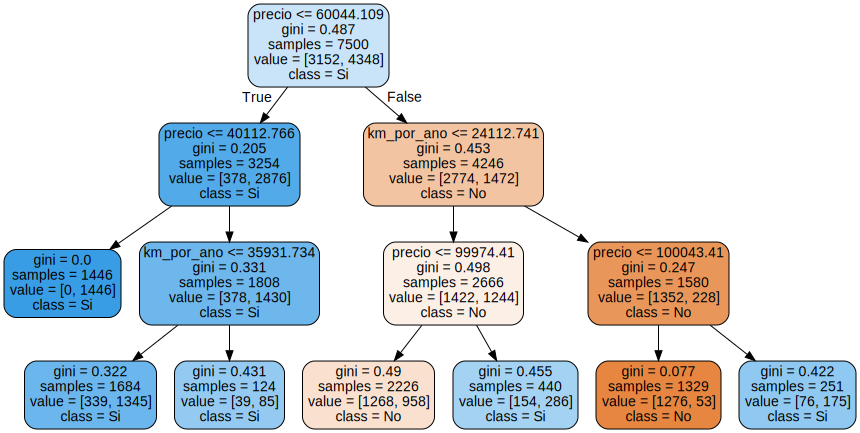

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from ast import GeneratorExp
from sklearn.tree import export_graphviz
import graphviz


uri = 'https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv'
datos= pd.read_csv(uri)
mapa={'mileage_per_year':'millas_por_ano',
      'model_year':'ano_modelo',
      'price':'precio',
      'sold':'vendido'}
datos=datos.rename(columns=mapa)
cambio={'yes':1,'no':0}
datos.vendido=datos.vendido.map(cambio)
ano_actual=datetime.today().year
datos['edad_del_modelo']=ano_actual - datos.ano_modelo
datos['km_por_ano']=datos.millas_por_ano*1.60934
datos = datos.drop(columns=['Unnamed: 0','millas_por_ano','ano_modelo'],axis=1)

x=datos[['edad_del_modelo','precio','km_por_ano']]
y=datos[['vendido']]

SEED=40
np.random.seed(SEED)
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=SEED)
print(f'Entrenamos con {len(x_train)} elementos y probamos con {len(x_test)}')

model= DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_acierto= accuracy_score(y_test,previsiones)
print(f'La tasa de acierto fue de {round(tasa_acierto*100,2)}%')

features=x.columns
dot_data=export_graphviz(model, feature_names=features, filled=True, rounded=True, class_names=['No','Si'])
grafico= graphviz.Source(dot_data)
grafico

#Recepcion de datos

In [ ]:
#suponemos que nos pasan los datos ordenados por algun criterio
datos_ord=datos.sort_values('vendido',ascending=True)
x_ord= datos_ord[['precio','edad_del_modelo','km_por_ano']]
y_ord= datos_ord['vendido']
datos_ord

,precio,vendido,edad_del_modelo,km_por_ano
4999,74023.29,0,18,24812.80412
5322,84843.49,0,19,23095.63834
5319,83100.27,0,25,36240.72746
5316,87932.13,0,22,32249.56426
5315,77937.01,0,21,28414.50704
...,...,...,...,...
5491,71910.43,1,15,25778.40812
1873,30456.53,1,12,15468.97608
1874,69342.41,1,17,16909.33538
5499,70520.39,1,22,19622.68262


In [ ]:
#base sobre la que se trabaja, para mejorar

from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 301
np.random.seed(SEED)

#modelo Dummy
modelo = DummyClassifier()
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con dummy stratified, 10 = [58.00, 58.00]


In [ ]:
SEED = 301
np.random.seed(SEED)

#modelo Decision Tree (max_depth=2)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con cross validation, 10 = [73.83, 77.73]


In [ ]:
#generando datos aleatorios del modelo de carro ,ver si sube la precision
np.random.seed(SEED)
datos['modelo'] = datos.edad_del_modelo + np.random.randint(-2, 3, size=10000)
datos.modelo = datos.modelo + abs(datos.modelo.min()) + 1
datos.head()

,precio,vendido,edad_del_modelo,km_por_ano,modelo
0,30941.02,1,24,35085.22134,28
1,40557.96,1,26,12622.05362,34
2,89627.50,0,18,11440.79806,24
3,95276.14,0,9,43167.32682,16
4,117384.68,1,10,12770.11290,15


In [ ]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desviacion = results['test_score'].std() * 100
  print("Accuracy media %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [ ]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 75.78
Intervalo [73.67, 77.90]


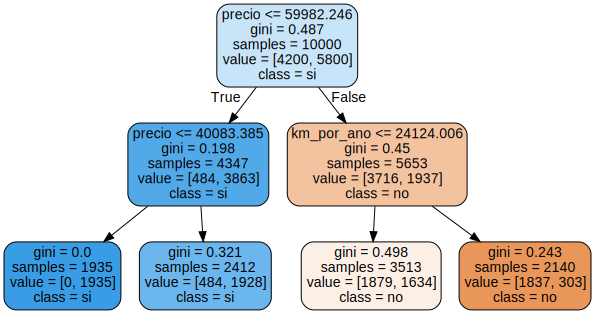

In [ ]:
modelo.fit(x_ord,y_ord) #entrena al modelo, antes solo se habia probado

features = x_ord.columns
dot_data=export_graphviz(modelo,out_file=None, filled=True, rounded=True,
                class_names=['no','si'], feature_names=features)
graph=graphviz.Source(dot_data)
graph

Accuracy media 78.67
Intervalo [76.40, 80.94]


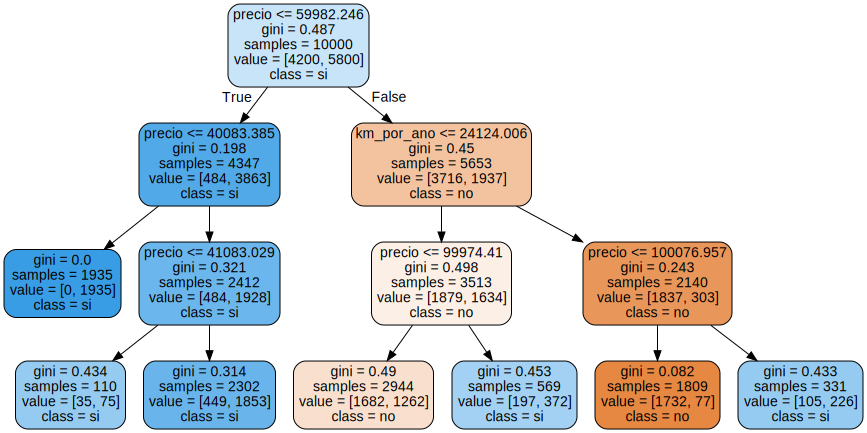

In [ ]:
cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3) #mas pasos
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

modelo.fit(x_ord,y_ord) #entrena al modelo, antes solo se habia probado

features = x_ord.columns
dot_data=export_graphviz(modelo,out_file=None, filled=True, rounded=True,
                class_names=['no','si'], feature_names=features)
graph=graphviz.Source(dot_data)
graph

In [ ]:
cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10) #mas profundidad
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 77.18
Intervalo [75.16, 79.20]


In [ ]:
#No por aumentar los pasos se mejora la presicion, se deben ajustar mas variables

# Probando parametros

In [ ]:
def iniciar_arbol_de_decision(max_depth):
  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth) #mas profundidad
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
  imprime_resultados(results)

iniciar_arbol_de_decision(3)
iniciar_arbol_de_decision(5)

Accuracy media 78.67
Intervalo [76.40, 80.94]
Accuracy media 78.54
Intervalo [76.35, 80.72]


In [ ]:
def iniciar_arbol_de_decision(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth) #mas profundidad
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
  test_score = results['test_score'].mean()*100
  print('Arbol max_depth= %d, testing = %.2f' % (max_depth, test_score))

In [ ]:
for i in range(1,33):
  iniciar_arbol_de_decision(i)

Arbol max_depth= 1, testing = 75.78
Arbol max_depth= 2, testing = 75.78
Arbol max_depth= 3, testing = 78.67
Arbol max_depth= 4, testing = 78.63
Arbol max_depth= 5, testing = 78.56
Arbol max_depth= 6, testing = 78.12
Arbol max_depth= 7, testing = 77.96
Arbol max_depth= 8, testing = 77.86
Arbol max_depth= 9, testing = 77.38
Arbol max_depth= 10, testing = 77.19
Arbol max_depth= 11, testing = 76.97
Arbol max_depth= 12, testing = 76.49
Arbol max_depth= 13, testing = 75.81
Arbol max_depth= 14, testing = 75.66
Arbol max_depth= 15, testing = 75.16
Arbol max_depth= 16, testing = 75.11
Arbol max_depth= 17, testing = 74.74
Arbol max_depth= 18, testing = 74.33
Arbol max_depth= 19, testing = 74.34
Arbol max_depth= 20, testing = 74.22
Arbol max_depth= 21, testing = 73.80
Arbol max_depth= 22, testing = 73.81
Arbol max_depth= 23, testing = 73.38
Arbol max_depth= 24, testing = 73.43
Arbol max_depth= 25, testing = 73.14
Arbol max_depth= 26, testing = 73.04
Arbol max_depth= 27, testing = 72.91
Arbol max_

In [ ]:
#overfitting, el modelo entreno con los datos de entrenamiento pero no esta apto a tomar decisiones con los datos reales

In [ ]:
def iniciar_arbol_de_decision(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth) #mas profundidad
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  print('Arbol max_depth= %d, training = %.2f, testing = %.2f' % (max_depth, train_score, test_score))
  tabla=[max_depth,train_score,test_score]
  return tabla

resultados=[iniciar_arbol_de_decision(i) for i in range(1,33)]
resultados=pd.DataFrame(resultados, columns=['max_depth','train', 'test'])
resultados.head()

Arbol max_depth= 1, training = 75.79, testing = 75.78
Arbol max_depth= 2, training = 75.79, testing = 75.78
Arbol max_depth= 3, training = 78.75, testing = 78.67
Arbol max_depth= 4, training = 78.79, testing = 78.63
Arbol max_depth= 5, training = 78.94, testing = 78.56
Arbol max_depth= 6, training = 79.17, testing = 78.12
Arbol max_depth= 7, training = 79.50, testing = 77.96
Arbol max_depth= 8, training = 79.89, testing = 77.86
Arbol max_depth= 9, training = 80.46, testing = 77.38
Arbol max_depth= 10, training = 81.16, testing = 77.19
Arbol max_depth= 11, training = 82.03, testing = 76.97
Arbol max_depth= 12, training = 82.89, testing = 76.49
Arbol max_depth= 13, training = 83.95, testing = 75.81
Arbol max_depth= 14, training = 85.03, testing = 75.66
Arbol max_depth= 15, training = 86.14, testing = 75.16
Arbol max_depth= 16, training = 87.19, testing = 75.11
Arbol max_depth= 17, training = 88.31, testing = 74.74
Arbol max_depth= 18, training = 89.26, testing = 74.33
Arbol max_depth= 19

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

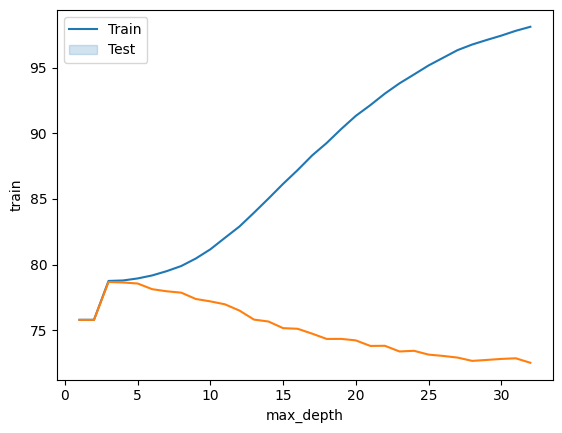

In [ ]:
sns.lineplot(x='max_depth', y='train',data=resultados)
sns.lineplot(x='max_depth', y='test',data=resultados)
plt.legend(['Train','Test']);

In [ ]:
#mejora la performance del entrenamiento pero empeora para los datos de test, se amolda y aprende tanto los datos de entrenamiento que se prepara para predecir solo los datos del entrenamiento, no asimila ni aprende nuevas reglas para los casos reales

In [ ]:
resultados.sort_values('test', ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


In [ ]:
def iniciar_arbol_de_decision(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  print('Arbol max_depth= %d, min_samples_leaf = %d ,training = %.2f, testing = %.2f' % (max_depth, min_samples_leaf,train_score, test_score))
  tabla=[max_depth,min_samples_leaf,train_score,test_score]
  return tabla


def buscar():
  resultados=[]
  for max_depth in range(1,33):
    for min_samples_leaf in range(1,33):
      tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
      resultados.append(tabla)
  resultados=pd.DataFrame(resultados, columns=['max_depth','min_samples_leaf','train', 'test'])
  return resultados

resultados=buscar()
resultados.head()

Arbol max_depth= 1, min_samples_leaf = 1 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 2 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 3 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 4 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 5 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 6 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 7 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 8 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 9 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 10 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 11 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 12 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 13 ,training = 75.79, testing = 75.78
Arbol ma

KeyboardInterrupt: 

In [ ]:
def buscar():
  resultados=[]
  for max_depth in range(1,33):
    for min_samples_leaf in [32,64,128,256]:
      tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
      resultados.append(tabla)
  resultados=pd.DataFrame(resultados, columns=['max_depth','min_samples_leaf','train', 'test'])
  return resultados

resultados=buscar()
resultados.head()

Arbol max_depth= 1, min_samples_leaf = 32 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 64 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 128 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 256 ,training = 75.79, testing = 75.78
Arbol max_depth= 2, min_samples_leaf = 32 ,training = 75.79, testing = 75.78
Arbol max_depth= 2, min_samples_leaf = 64 ,training = 75.79, testing = 75.78
Arbol max_depth= 2, min_samples_leaf = 128 ,training = 75.79, testing = 75.78
Arbol max_depth= 2, min_samples_leaf = 256 ,training = 75.79, testing = 75.78
Arbol max_depth= 3, min_samples_leaf = 32 ,training = 78.75, testing = 78.67
Arbol max_depth= 3, min_samples_leaf = 64 ,training = 78.75, testing = 78.67
Arbol max_depth= 3, min_samples_leaf = 128 ,training = 78.75, testing = 78.67
Arbol max_depth= 3, min_samples_leaf = 256 ,training = 78.75, testing = 78.67
Arbol max_depth= 4, min_samples_leaf = 32 ,training = 78.75, testing =

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [ ]:
resultados.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


# Matriz de correlación

In [ ]:
corr=resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.780775e-16,0.536705,-0.027675
min_samples_leaf,-2.780775e-16,1.000000e+00,-0.409676,0.349011
train,5.367048e-01,-4.096762e-01,1.000000,0.116466
test,-2.767507e-02,3.490111e-01,0.116466,1.000000


<Axes: >

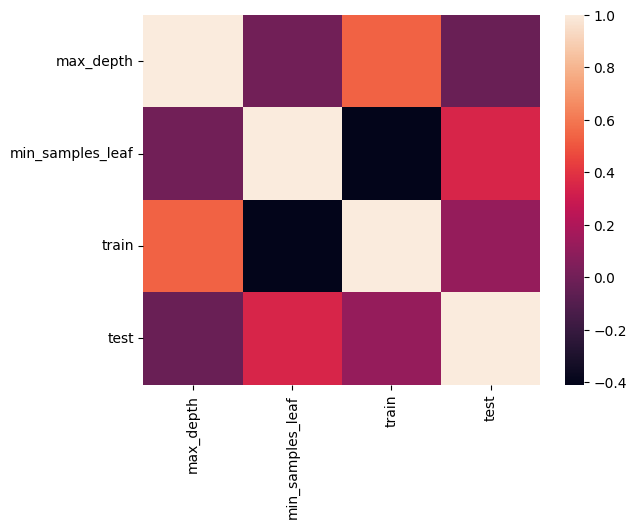

In [ ]:
sns.heatmap(corr)

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(resultados,figsize=(14,8),alpha=0.3);

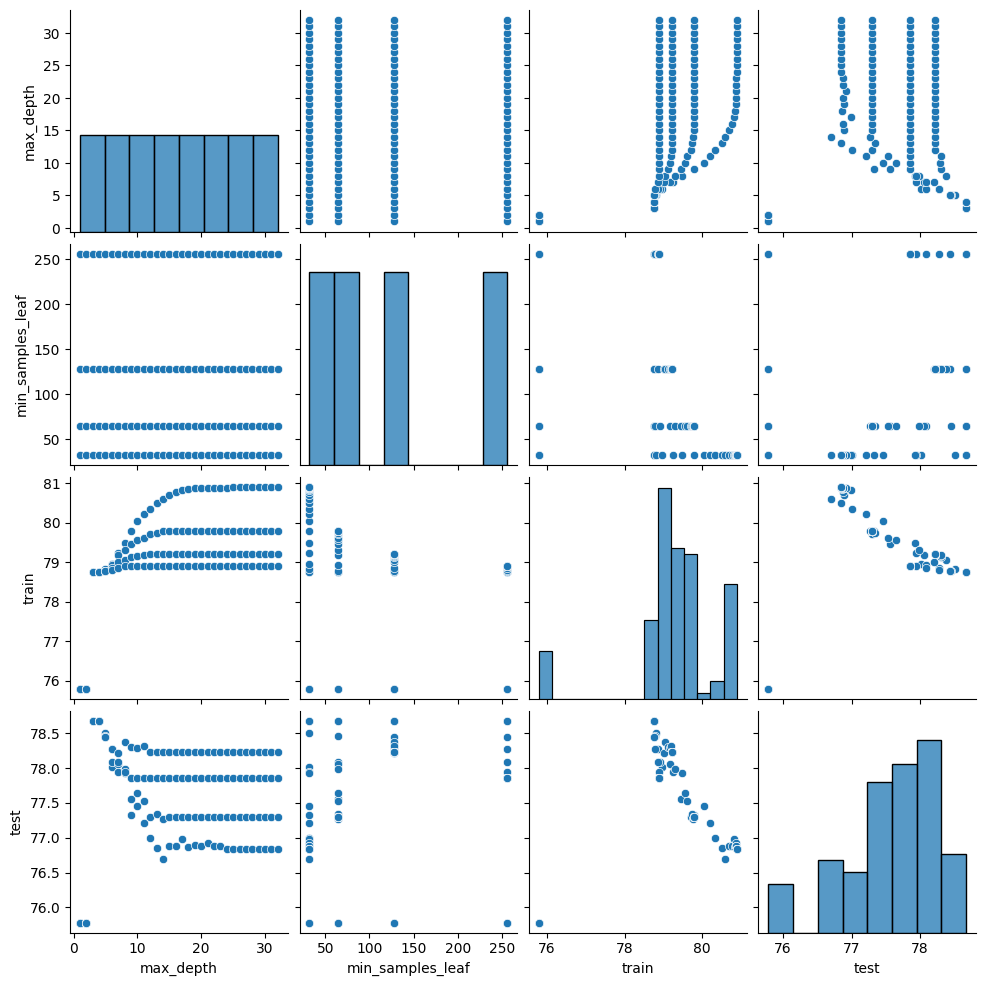

In [ ]:
sns.pairplot(resultados);

<Axes: >

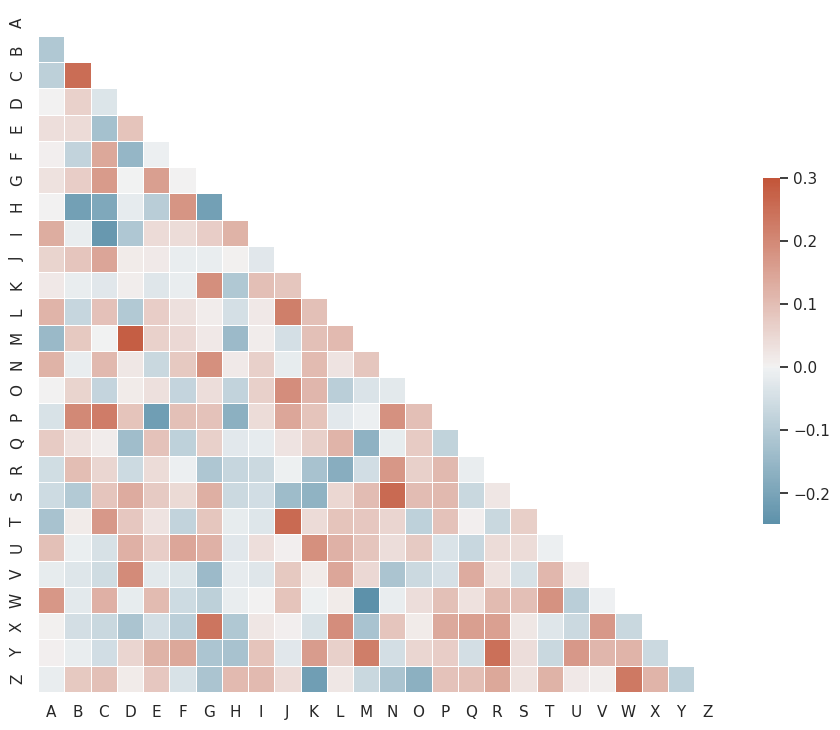

In [ ]:
#correlacion con seaborn
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
def buscar():
  resultados=[]
  for max_depth in range(1,10):
    for min_samples_leaf in [128, 190, 220, 256]:
      tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
      resultados.append(tabla)
  resultados=pd.DataFrame(resultados, columns=['max_depth','min_samples_leaf','train', 'test'])
  return resultados

resultados=buscar()
resultados.head()

Arbol max_depth= 1, min_samples_leaf = 128 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 190 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 220 ,training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 256 ,training = 75.79, testing = 75.78
Arbol max_depth= 2, min_samples_leaf = 128 ,training = 75.79, testing = 75.78
Arbol max_depth= 2, min_samples_leaf = 190 ,training = 75.79, testing = 75.78
Arbol max_depth= 2, min_samples_leaf = 220 ,training = 75.79, testing = 75.78
Arbol max_depth= 2, min_samples_leaf = 256 ,training = 75.79, testing = 75.78
Arbol max_depth= 3, min_samples_leaf = 128 ,training = 78.75, testing = 78.67
Arbol max_depth= 3, min_samples_leaf = 190 ,training = 78.75, testing = 78.67
Arbol max_depth= 3, min_samples_leaf = 220 ,training = 78.75, testing = 78.67
Arbol max_depth= 3, min_samples_leaf = 256 ,training = 78.75, testing = 78.67
Arbol max_depth= 4, min_samples_leaf = 128 ,training = 78.75, te

,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,190,75.791169,75.784219
2,1,220,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,128,75.791169,75.784219


In [ ]:
resultados.sort_values('test',ascending=False).head()

,max_depth,min_samples_leaf,train,test
13,4,190,78.750993,78.672633
11,3,256,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,220,78.750993,78.672633
12,4,128,78.750993,78.672633


#3 dimensiones de hiper parametros

In [ ]:
def iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  fit_time= results['fit_time'].mean()
  score_time = results['score_time'].mean()
  print('Arbol max_depth= %d, min_samples_leaf = %d , min_samples_split= %d, training = %.2f, testing = %.2f' % (max_depth, min_samples_leaf,min_samples_split,train_score, test_score))
  tabla=[max_depth,min_samples_leaf,min_samples_split,train_score,test_score,fit_time,score_time]
  return tabla


def buscar():
  resultados=[]
  for max_depth in range(1,33):
    for min_samples_leaf in [128, 190, 220, 256]:
      for min_samples_split in [32,68,128,256]:
        tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf,min_samples_split)
        resultados.append(tabla)
  resultados=pd.DataFrame(resultados, columns=['max_depth','min_samples_leaf','min_samples_split','train', 'test','fit_time','score_time'])
  return resultados

resultados=buscar()
resultados.head()

Arbol max_depth= 1, min_samples_leaf = 128 , min_samples_split= 32, training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 128 , min_samples_split= 68, training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 128 , min_samples_split= 128, training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 128 , min_samples_split= 256, training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 190 , min_samples_split= 32, training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 190 , min_samples_split= 68, training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 190 , min_samples_split= 128, training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 190 , min_samples_split= 256, training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 220 , min_samples_split= 32, training = 75.79, testing = 75.78
Arbol max_depth= 1, min_samples_leaf = 220 , min_samples_split= 68, training =

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,128,32,75.791169,75.784219,0.005025,0.001540
1,1,128,68,75.791169,75.784219,0.004476,0.001318
2,1,128,128,75.791169,75.784219,0.004525,0.001401
3,1,128,256,75.791169,75.784219,0.004608,0.001417
4,1,190,32,75.791169,75.784219,0.004958,0.001393


In [ ]:
corr=resultados.corr()

<Axes: >

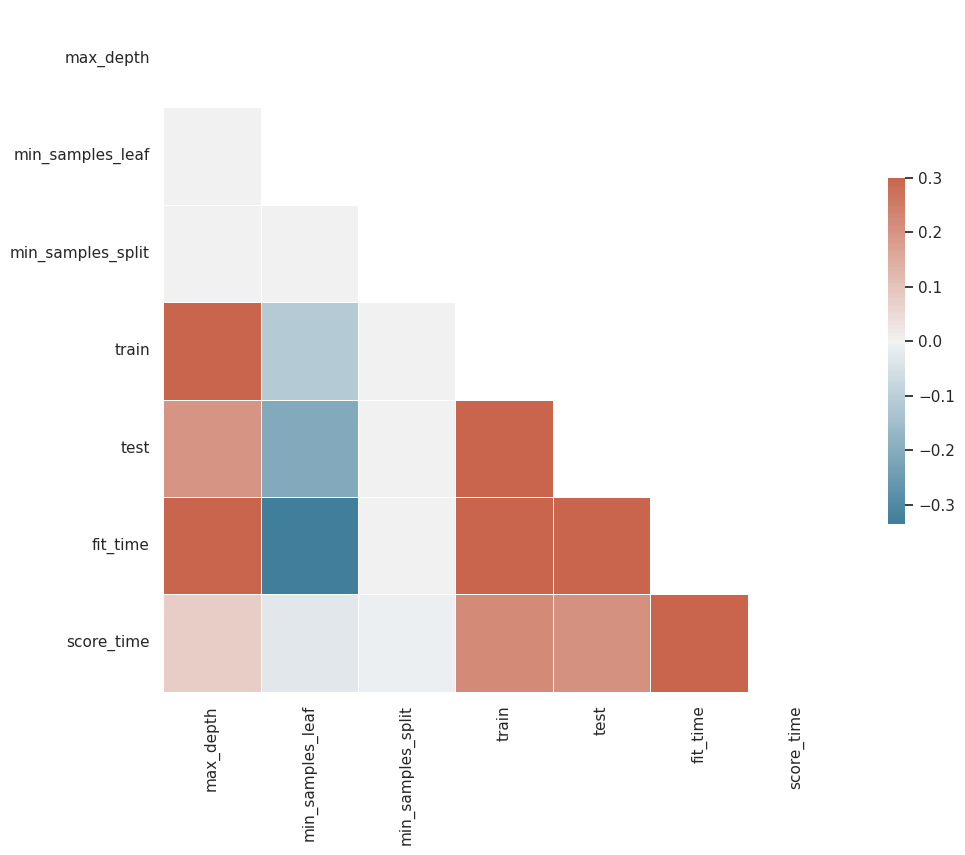

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
resultados.sort_values('test',ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
50,4,128,128,78.750993,78.672633,0.010515,0.001592
35,3,128,256,78.750993,78.672633,0.008809,0.001516
54,4,190,128,78.750993,78.672633,0.010327,0.001613
53,4,190,68,78.750993,78.672633,0.010567,0.001678
52,4,190,32,78.750993,78.672633,0.010265,0.001495


In [ ]:
#si bien hay mejor performance en la 1er linea, los tiempos de ejecucion fueron mejores con los hiper parametros de la segunda

#GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espacio_parametros= {'max_depth':[3,5],
                     'min_samples_split':[128,190,220, 256],
                     'min_samples_leaf':[32,64,128],
                     'criterion':['gini','entropy']} #criterio de validacion cruzada

        #GridSearchCV(Tipo_modelo_de_datos,parametros a evaluar, requiere validacion cruzada?)
buscar= GridSearchCV(DecisionTreeClassifier(),espacio_parametros, cv=GroupKFold(n_splits=10))

#entreno el modelo
buscar.fit(x_ord,y_ord,groups=datos.modelo)

resultados=pd.DataFrame(buscar.cv_results_)

resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009365,0.000824,0.001753,0.000459,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.008936,0.000215,0.001656,0.000048,gini,3,32,190,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.009026,0.000390,0.001764,0.000181,gini,3,32,220,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.009510,0.001457,0.001760,0.000264,gini,3,32,256,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.008691,0.000352,0.001428,0.000148,gini,3,64,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [ ]:
print(buscar.best_params_) #mejor combinacion de parametros
print(buscar.best_score_ *100) #best accurancy

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 128}
78.67263337284332


In [ ]:
mejor = buscar.best_estimator_
mejor #mejor modelo de los evaluados (modelo entrenado)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=128)

In [ ]:
prediccion = mejor.predict(x_ord)
accuracy = accuracy_score(prediccion,y_ord)*100

print('Accuracy para los datos fue %.2f%%'% accuracy)

Accuracy para los datos fue 78.75%


#Nested Cross Validation

In [ ]:
#el cross_validation no será igual a la efectividad real con el uso del grid search cv
#se debe revaloral el mejor modelo

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

espacio_parametros= {'max_depth':[3,5],
                     'min_samples_split':[128,190,220, 256],
                     'min_samples_leaf':[32,64,128],
                     'criterion':['gini','entropy']} #criterio de validacion cruzada

        #GridSearchCV(Tipo_modelo_de_datos,parametros a evaluar, requiere validacion cruzada?)
buscar= GridSearchCV(DecisionTreeClassifier(),espacio_parametros, cv=KFold(n_splits=5, shuffle= True))

#entreno el modelo
buscar.fit(x_ord,y_ord)

resultados=pd.DataFrame(buscar.cv_results_)

resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010737,0.000857,0.002763,0.000243,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.010036,0.000146,0.002257,0.000146,gini,3,32,190,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.010120,0.000162,0.002153,0.000125,gini,3,32,220,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.010894,0.001338,0.002084,0.000143,gini,3,32,256,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.010459,0.000676,0.002375,0.000434,gini,3,64,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [ ]:
#1er validacion

In [ ]:
from sklearn.model_selection import cross_val_score

scores= cross_val_score(buscar,x_ord, y_ord, cv=KFold(n_splits=5,shuffle=True))

scores

array([0.777 , 0.7925, 0.784 , 0.781 , 0.7965])

In [ ]:
#2da validacion

In [ ]:
def imprime_score(scores):
  media=scores.mean()*100
  desviacion =scores.std()*100
  print('Accuracy media %.2f' % media)
  print('Intervalo [%.2f,%.2f]'%(media-2*desviacion,media+2*desviacion))

In [ ]:
imprime_score(scores)

Accuracy media 78.62
Intervalo [77.17,80.07]


In [ ]:
mejor=buscar.best_estimator_
mejor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=128)

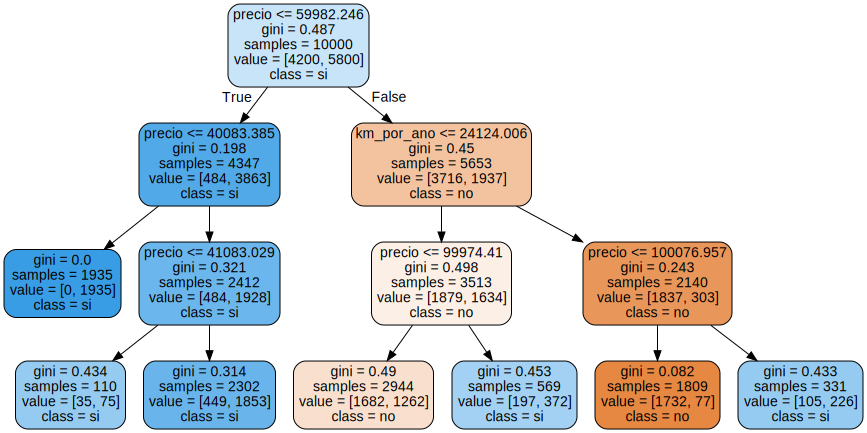

In [ ]:
features=x_ord.columns
dot_data=export_graphviz(mejor,out_file=None, filled=True,
                         rounded=True, class_names=['no','si'], feature_names=features)
graph= graphviz.Source(dot_data)
graph